## Plot ABCD demographics
To generate .csv files, run scripts/abcd_plots.py

In [114]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

input_annotation_file = 'data/pop_norms.csv'
df = pd.read_csv(input_annotation_file, header=0)

import scipy
df_centile_boys = pd.read_csv('data/percentiles_chart_boys.csv',header=0)
df_centile_girls = pd.read_csv('data/percentiles_chart_girls.csv',header=0)


def closest_value(input_list, input_value):
    arr = np.asarray(input_list)
    i = (np.abs(arr - input_value)).argmin()
    return arr[i], i

def find_centile(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    centile = 'out of range'
    if input_tmt<df.iloc[i]['X3']:
        centile ='< 3'
    if df.iloc[i]['X3']<=input_tmt<df.iloc[i]['X10']:
        centile ='3-10'
    if df.iloc[i]['X10']<=input_tmt<df.iloc[i]['X25']:
        centile ='10-25'
    if df.iloc[i]['X25']<=input_tmt<df.iloc[i]['X50']:
        centile ='25-50'
    if df.iloc[i]['X50']<=input_tmt<df.iloc[i]['X75']:
        centile ='50-75'
    if df.iloc[i]['X75']<=input_tmt<df.iloc[i]['X90']:
        centile ='75-90'
    if df.iloc[i]['X90']<=input_tmt<df.iloc[i]['X97']:
        centile ='90-97'
    if input_tmt>df.iloc[i]['X97']:
        centile ='97>'
    #print(val,i,centile)
    return centile

def find_exact_percentile_return_number(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    mu = df.iloc[i]['mu']
    sigma = df.iloc[i]['sigma']
    nu = df.iloc[i]['nu']
    #tau = df.iloc[i]['tau']
    
    if nu!=0:
        z = ((input_tmt/mu)**(nu)-1)/(nu*sigma)
    else:
        z = 1/sigma * math.log(input_tmt/mu)
    percentile = scipy.stats.norm.cdf(z)
    return round(percentile*100,2)

In [2]:
# CSA and TM correlations
from scipy.stats import pearsonr
from scipy.stats import permutation_test

def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)


corr, _ = pearsonr(df['TMT PRED AVG filtered'], df['CSA PRED AVG w line'])
print('Pearsons correlation for CSA and TMT: %.3f' % corr)

corr, _ = pearsonr(df['TMT PRED AVG filtered'], df['TMT PRED AVG 90 filtered'])
print('Pearsons correlation for the min feret and max90 feret: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df['TMT PRED AVG filtered'], df['CSA PRED AVG w line'])
print('Spearmans correlation for TMT and CSA: %.3f' % corr)

Pearsons correlation for CSA and TMT: 0.903
Pearsons correlation for the min feret and max90 feret: 0.989
Spearmans correlation for TMT and CSA: 0.915


In [58]:
df_ant = pd.read_csv("data/ABCD-studies/abcd_bmi.csv", header=0)
corr, _ = pearsonr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and weight: %.3f' % corr)
corr, _ = pearsonr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and BMI: %.3f' % corr)
corr, _ = pearsonr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and Height: %.3f' % corr)

corr, _ = spearmanr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and weight: %.3f' % corr)
corr, _ = spearmanr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and BMI: %.3f' % corr)
corr, _ = spearmanr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and Height: %.3f' % corr)

Pearsons correlation for the TMT and weight: 0.655
Pearsons correlation for the TMT and BMI: 0.086
Pearsons correlation for the TMT and Height: 0.373
Spearmans correlation for the TMT and weight: 0.634
Spearmans correlation for the TMT and BMI: 0.630
Spearmans correlation for the TMT and Height: 0.383


In [62]:
df_ant=df_ant[df_ant['TMT PRED AVG filtered']<350]
df_ant=df_ant[df_ant['BMI']<35]

Pearsons correlation for the TMT and weight: 0.668
Pearsons correlation for the TMT and BMI: 0.656
Pearsons correlation for the TMT and Height: 0.384
Spearmans correlation for the TMT and weight: 0.630
Spearmans correlation for the TMT and BMI: 0.629
Spearmans correlation for the TMT and Height: 0.378


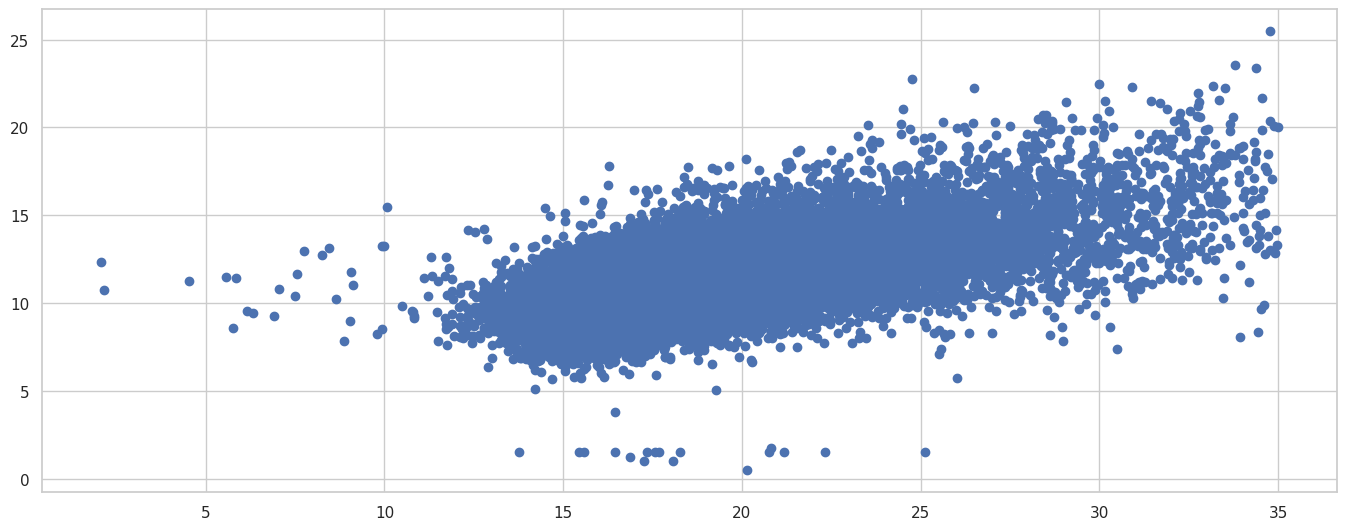

In [81]:
df_ant.loc[df_ant['BMI'] > 35, 'BMI'] = 35
df_ant.loc[df_ant['TMT PRED AVG filtered'] > 35, 'TMT PRED AVG filtered'] = 35
plt.scatter(df_ant['BMI'],df_ant['TMT PRED AVG filtered'])
corr, _ = pearsonr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and weight: %.3f' % corr)
corr, _ = pearsonr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and BMI: %.3f' % corr)
corr, _ = pearsonr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and Height: %.3f' % corr)

corr, _ = spearmanr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and weight: %.3f' % corr)
corr, _ = spearmanr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and BMI: %.3f' % corr)
corr, _ = spearmanr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and Height: %.3f' % corr)

In [82]:
df_ant = pd.read_csv("data/ABCD-studies/abcd_bmi.csv", header=0)
corr, _ = pearsonr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and weight: %.3f' % corr)
corr, _ = pearsonr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and BMI: %.3f' % corr)
corr, _ = pearsonr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Pearsons correlation for the TMT and Height: %.3f' % corr)

corr, _ = spearmanr(df_ant['Weight'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and weight: %.3f' % corr)
corr, _ = spearmanr(df_ant['BMI'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and BMI: %.3f' % corr)
corr, _ = spearmanr(df_ant['Height'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and Height: %.3f' % corr)

Pearsons correlation for the TMT and weight: 0.655
Pearsons correlation for the TMT and BMI: 0.086
Pearsons correlation for the TMT and Height: 0.373
Spearmans correlation for the TMT and weight: 0.634
Spearmans correlation for the TMT and BMI: 0.630
Spearmans correlation for the TMT and Height: 0.383


In [83]:
corr, _ = spearmanr(df_ant['Age'], df_ant['TMT PRED AVG filtered'])
print('Spearmans correlation for the TMT and Age: %.3f' % corr)

Spearmans correlation for the TMT and Age: 0.218


In [8]:
df_ant.columns

Index(['Unnamed: 0', 'id', 'Visit', 'Age', 'gender', 'Height', 'Weight', 'BMI',
       'TMT PRED AVG filtered'],
      dtype='object')

In [211]:
df.loc[df.Age > 30, 'Age'] = 30

## 0.Individual growth chart 

In [29]:
df[df['Dataset']=='ABCD']['ID'].str.split("_", expand=True)[1].value_counts()

ses-baselineYear1Arm1     11301
ses-2YearFollowUpYArm1     7648
Name: 1, dtype: int64

In [263]:
create_centile_track = [] 
# Vector origin location
X_age = []
Y_tmt = []
  
# Directional vectors
U_age = []  
V_tmt = []
ids =[]
id_list = df[df['Dataset']=='ABCD']['ID'].str.split("_", expand=True)[0]
for i in range(0, len(id_list)):
    id_pat = id_list.iloc[i]
    if len(df[df['ID'].str.contains(id_pat)])>1:
        gender = df[df['ID'].str.contains(id_pat)].iloc[0]['Gender']
        #print(len(df[df['ID'].str.contains(id_pat)]))
        if gender == 1:
            first_age = df[df['ID'].str.contains(id_pat)].iloc[0]['Age']
            second_age = df[df['ID'].str.contains(id_pat)].iloc[1]['Age']
            first = find_exact_percentile_return_number(df[df['ID'].str.contains(id_pat)].iloc[0]['TMT PRED AVG filtered'], 
                                    first_age, 
                                    df_centile_boys)
            second = find_exact_percentile_return_number(df[df['ID'].str.contains(id_pat)].iloc[1]['TMT PRED AVG filtered'], 
                                    second_age, 
                                    df_centile_boys)
        else:
            first_age = df[df['ID'].str.contains(id_pat)].iloc[0]['Age']
            second_age = df[df['ID'].str.contains(id_pat)].iloc[1]['Age']
            first = find_exact_percentile_return_number(df[df['ID'].str.contains(id_pat)].iloc[0]['TMT PRED AVG filtered'], 
                                    first_age, 
                                    df_centile_girls)
            second = find_exact_percentile_return_number(df[df['ID'].str.contains(id_pat)].iloc[1]['TMT PRED AVG filtered'], 
                                    second_age, 
                                    df_centile_girls)
        ids.append(id_pat)
        X_age.append(first_age)
        Y_tmt.append(first)
        U_age.append(second_age)
        V_tmt.append(second)
    #if i > 2000:
    #    break
    
X_age = np.asarray(X_age)
Y_tmt = np.asarray(Y_tmt)
U_age = np.asarray(U_age)
V_tmt = np.asarray(V_tmt)           


/tmp/ipykernel_3689773/4191921710.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  z = ((input_tmt/mu)**(nu)-1)/(nu*sigma)


In [264]:
len(ids),len(X_age)

(14642, 14642)

In [295]:
def magnitude_(x_values,y_values):
    alpha = 25
    if (x_values[1]-x_values[0])>=0 and (y_values[1]-y_values[0])>=0:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='r'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
    elif (y_values[1]-y_values[0])<=0 and (x_values[1]-x_values[0])<=0:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='r'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
    else:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='b'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
    return return_val, transparency

2320


Text(0, 0.5, 'Centile')

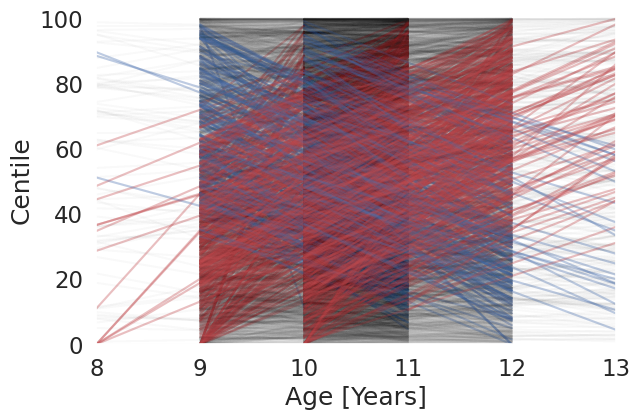

In [296]:
#plt.grid()
sns.set(rc={'figure.figsize':(6.7,4.27),'axes.facecolor':'white', 'figure.facecolor':'white'},font_scale= 1.5)
count = 0
ids_extreme = []
for i in range(0,len(X_age)):
    x_values = [X_age[i], U_age[i]]
    y_values = [Y_tmt[i], V_tmt[i]]
    col,transparency = magnitude_(x_values,y_values)
    if transparency>0.1:
        count+=1
        ids_extreme.append([ids[i],y_values,x_values])
    plt.plot(x_values, y_values, col, linestyle="-",alpha=transparency)  
    
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(35)
    
print(count)
plt.xlim(8, 13)
plt.ylim(0, 101)
plt.xlabel('Age [Years]')
plt.ylabel('Centile')
# do some color encoding

In [372]:
def magnitude_aplha(x_values,y_values):
    alpha = 25
    mag = abs(y_values[1]-y_values[0])
    if (x_values[1]-x_values[0])>=0 and (y_values[1]-y_values[0])>=0:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='r'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
    elif (y_values[1]-y_values[0])<=0 and (x_values[1]-x_values[0])<=0:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='r'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
    else:
        if abs(y_values[1]-y_values[0])>=alpha:
            return_val='b'
            transparency=0.2
        else:
            return_val='k'
            transparency=0.01
            
    return return_val, transparency, mag

#plt.grid()
sns.set(rc={'figure.figsize':(6.7,4.27),'axes.facecolor':'white', 'figure.facecolor':'white'},font_scale= 1.5)
count = 0
thickness_computation=[]
ids_extreme = []
ids_norma =[]
ages =[]
mag=[]
for i in range(0,len(X_age)):
    x_values = [X_age[i], U_age[i]]
    y_values = [Y_tmt[i], V_tmt[i]]
    col,transparency, m = magnitude_aplha(x_values,y_values)
    mag.append(m)
    ages.append(X_age[i])
    if transparency>0.1:
        count+=1
        ids_extreme.append([ids[i],y_values,x_values]) 
    else:
        ids_norma.append([ids[i],y_values,x_values]) 

# do some color encoding

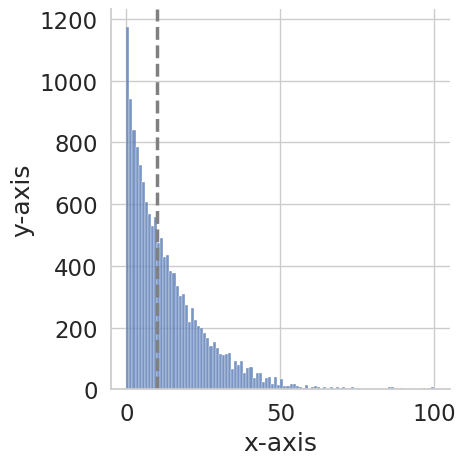

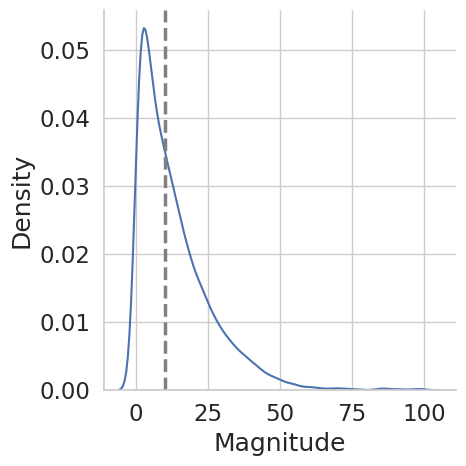

In [409]:
df_std= pd.DataFrame([])
df_std['Age']=ages
df_std['Magnitude']=mag
df_std['density'] = (df['Age'].map(df['Age'].value_counts())).astype(int)
df_std['Magnitude binned']=df_std['Magnitude']//10
df_std['density binned'] = df_std['density']//100


sns.set({'axes.facecolor':'white', 'figure.facecolor':'white'})
#ax = plt.subplot()
sns.set_style("whitegrid")
ax = sns.displot(df_std, x="Magnitude", binwidth=1)
plt.axvline(x=df_std['Magnitude'].median(),color='gray',ls='--', 
            lw=2.5)
sns.displot(df_std, x="Magnitude", kind="kde")#, multiple="stack",hue='Age')
plt.axvline(x=df_std['Magnitude'].median(),color='gray',ls='--', 
            lw=2.5)
ax.set(xlabel="x-axis", ylabel="y-axis")
 
# visualizing illustration
plt.show()

In [614]:
df_std['Magnitude'].median()

9.850000000000009

In [404]:
# BMI drops 
for id_pat,x,y in ids_extreme:
    new_bmi = df_ant[df_ant['id'].str.contains(id_pat.split("-")[1])].sort_values(by='Age')
    if len(new_bmi)==2:
        delta_bmi = new_bmi['BMI'].iloc[1]-new_bmi['BMI'].iloc[0]
        if delta_bmi < -7 :
            print(id_pat.split("-")[1],delta_bmi,x,y)
            #break

In [ ]:
# BMI drops, ITMT same 
for id_pat,x,y in ids_norma:
    new_bmi = df_ant[df_ant['id'].str.contains(id_pat.split("-")[1])].sort_values(by='Age')
    if len(new_bmi)==2:
        delta_bmi = new_bmi['BMI'].iloc[1]-new_bmi['BMI'].iloc[0]
        if delta_bmi < -7 and abs(x[1]-x[0])<10:
            print(id_pat.split("-")[1],delta_bmi,x,y)
            #break

In [397]:
# BMI grows
for id_pat,x,y in ids_norma:
    new_bmi = df_ant[df_ant['id'].str.contains(id_pat.split("-")[1])].sort_values(by='Age')
    if len(new_bmi)==2:
        delta_bmi = new_bmi['BMI'].iloc[1]-new_bmi['BMI'].iloc[0]
        if delta_bmi > 7:
            print(id_pat.split("-")[1],delta_bmi,x,y)
            #break

NDARINVFXC7A0T2 8.338207727880192 [14.48, 39.39] [9, 11]
NDARINVJYHUJ7E5 9.62562528554233 [45.22, 40.12] [9, 10]
NDARINVEL2DU62H 7.283932568045628 [74.37, 90.28] [9, 10]
NDARINV2MMJJTBJ 7.3987748923891985 [83.29, 76.78] [9, 10]
NDARINV72MV78KG 7.835506279495725 [90.66, 99.89] [9, 11]
NDARINVRNG7B964 9.3055057823889 [23.81, 45.41] [9, 10]
NDARINV5G3DP835 7.091640129101663 [76.63, 95.42] [9, 11]
NDARINVFBU7WX6N 20.766833898559142 [69.98, 81.63] [9, 11]
NDARINV87GZTDJ0 7.842282414758948 [86.43, 90.57] [9, 11]
NDARINV8DPZJA7V 7.418983991855086 [65.23, 86.94] [9, 11]
NDARINVB5JG1BH6 7.9939817620402955 [10.18, 22.95] [9, 11]
NDARINVAT01LBA6 8.924188284112692 [89.74, 90.26] [9, 11]
NDARINV35PCA3BK 8.401977709098063 [99.38, 99.87] [9, 11]
NDARINV12NED96V 11.32734485814716 [63.98, 83.09] [9, 11]
NDARINVG8JBY950 8.499853905575392 [37.47, 52.14] [9, 11]
NDARINVXFY5F1AC 16.4102050947033 [99.67, 99.76] [9, 11]
NDARINV8AMD17WG 7.012907250772496 [15.74, 33.85] [9, 11]
NDARINVP2EL0JFJ 7.68178092080310

NDARINVK777BPZJ 7.153004342812835 [99.83, 99.68] [9, 11]
NDARINV8DPZJA7V 7.418983991855086 [65.23, 86.94] [9, 11]
NDARINVRX41226B 9.804979891169769 [29.28, 34.79] [9, 11]
NDARINVPH0R4T6M 8.338924870708599 [65.19, 47.37] [9, 11]
NDARINVG8JBY950 8.499853905575392 [37.47, 52.14] [9, 11]
NDARINVTTV73ARA 9.110472847304118 [75.13, 68.59] [9, 11]
NDARINVPZ7LHWF8 8.963321137218024 [97.46, 97.0] [9, 11]
NDARINVCENTPAJU 7.2598951501351685 [86.64, 94.42] [9, 11]
NDARINV4AGK770Z 12.989679680487903 [56.56, 47.37] [9, 11]
NDARINVCURLTGW2 7.01152450753391 [90.07, 92.44] [9, 11]
NDARINVMRG4R7HM 11.6175780200215 [95.4, 99.78] [9, 11]
NDARINVXFY5F1AC 16.4102050947033 [99.67, 99.76] [9, 11]
NDARINVU697JENW 21.301782278225293 [97.7, 85.9] [9, 11]
NDARINVJGLXMGJ2 9.75619626171618 [71.72, 95.66] [9, 11]
NDARINV5VD5LWH4 16.470575258454048 [89.9, 75.77] [9, 11]
NDARINVC5B20020 7.146188664780823 [69.69, 75.75] [9, 11]
NDARINVJ3DJV7E6 11.78594864348598 [100.0, 99.89] [9, 11]
NDARINVK5C5LXD2 8.52753526876073 [99

KeyboardInterrupt: 

In [410]:
print(df[df['ID'].str.contains('sub-NDARINVLABWKL63')][['ID','Slice label']])
df_ant[df_ant['id'].str.contains('NDARINVLABWKL63')].sort_values(by='Age')

                                                      ID  Slice label
4860   sub-NDARINVLABWKL63_ses-baselineYear1Arm1_run-...           70
16599  sub-NDARINVLABWKL63_ses-2YearFollowUpYArm1_run...           74


,Unnamed: 0,id,Visit,Age,gender,Height,Weight,BMI,TMT PRED AVG filtered,BMI Quantiles,Sex,TMT-BMI adj
10062,10062,NDARINVLABWKL63,baselineyear1arm1,8,1,39.00,77.0,35.589086,9.96,75%>,Male,0.279861
10061,10061,NDARINVLABWKL63,2yearfollowupyarm1,11,1,54.75,89.4,20.966435,10.88,75%>,Male,0.518925


[ 8 11] [35.6 20.9]


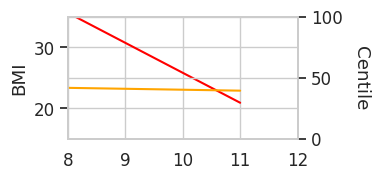

In [612]:
i = 4
age_arr=[[9,10],[9,11],[10,12],[10,12],[8,11]]
bmi_arr = [[19.7,20.1],[20,32.8],[23,32],[28.5,19.8],[35.6,20.9]]
centile_arr=[[63.9,66.7],[27.6,90],[47.2,45.6],[70,34.1],[41.7,39.4]]

plt.rcParams["figure.figsize"] = [4, 2]
plt.rcParams["figure.autolayout"] = True

bmi = np.array(bmi_arr[i])
centile = np.array(centile_arr[i])
age= np.array(age_arr[i])
#acceleration2 = np.array(df_individual_healthy['Centile CSA'])

print(age,bmi)
ax1 = plt.subplot()
l1, = ax1.plot(age, bmi, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(age, centile, color='orange')
ax1.set_ylabel('BMI')
ax2.set_ylabel('Centile',rotation=270, labelpad=20)
#ax1.set_xlabel('Age,years')

ax1.set_ylim([15, 35])
ax2.set_ylim([0, 100])
ax1.set_xlim([8, 12])
ax1.set_xticks(range(8,13,1))

#plt.legend([l1, l2], ["BMI", "Centile"])

plt.show()

## 1. Gender 

In [ ]:
#adding the boxplot with quartiles
import ptitprince as pt

import matplotlib.patheffects as path_effects
sns.set(style="whitegrid",font_scale= 2)
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='ultralight', color='gray')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])
        
f, ax = plt.subplots(figsize=(5, 5))
ax=pt.half_violinplot(y=cohort_df[cohort_df['Sex']==1]['TMT'],x=cohort_df[cohort_df['Sex']==1]['Cohort'],
                      data=cohort_df[cohort_df['Sex']==1], palette = 'colorblind', bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None)

ax=sns.stripplot(y=cohort_df[cohort_df['Sex']==1]['TMT'],x=cohort_df[cohort_df['Sex']==1]['Cohort'],
                      data=cohort_df[cohort_df['Sex']==1],
                 palette = 'colorblind', 
                 edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0)

ax=sns.boxplot( y=cohort_df[cohort_df['Sex']==1]['TMT'],x=cohort_df[cohort_df['Sex']==1]['Cohort'],
                      data=cohort_df[cohort_df['Sex']==1],
               color = "black", width = .05, zorder = 5,
               showcaps = True, boxprops = {'facecolor':'none', "zorder":5},
               showfliers=True, whiskerprops = {'linewidth':1, "zorder":5},
               saturation = 1)


add_median_labels(ax)
ax.set(title='Male')

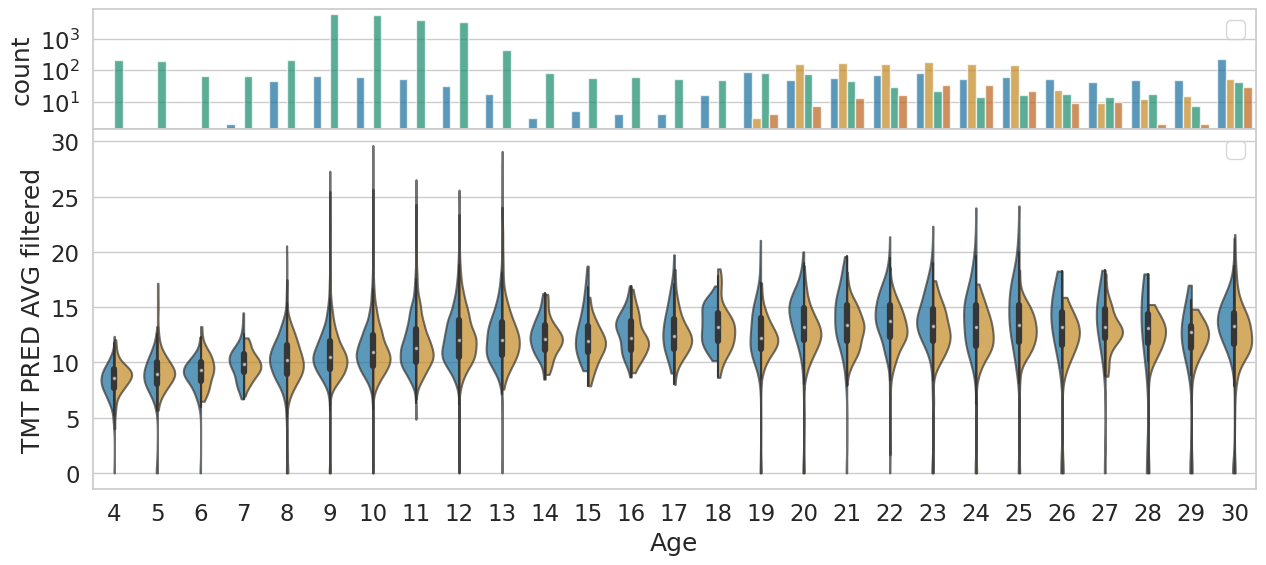

In [555]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 6), 
                         sharex=True, gridspec_kw=dict(height_ratios=(1, 3), hspace=0))


#sns.countplot(    x="Age", data=df,   ax=axes[0],color='gray')


sns.countplot(data=df, x="Age",ax=axes[0], hue="Geographic data",palette="colorblind", alpha=.7)

axes[0].set_yscale("log")
sns.violinplot(
    x="Age", y="TMT PRED AVG filtered", hue="Sex", data=df,  
    split=True, #scale="count", 
    #scale_hue=False, 
    cut=0,
    ax=axes[1],
                palette="colorblind"
)

ax=plt.setp(axes[1].collections, alpha=.7)
ax=plt.setp(axes[0].collections, alpha=.7)

#axes[1].set_xticklabels(["Lunch (Female)", "Lunch (Male)", "Dinner (Female)", "Dinner (Male)"])
#axes[1].set_xlabel("Time (Sex)")
axes[1].legend("")
axes[0].legend("")

In [ ]:
#plot general

#sns.set(style="whitegrid",font_scale= 1)
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'},font_scale= 1.5)
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})
sns.violinplot(x="Age", y="TMT PRED AVG filtered",
               hue="Sex", data=df, split=True,
               cut=0,inner='quartile',linewidthfloat=1,
            #showfliers=False,
            palette="colorblind",
               width=1.).set_title("Biological gender wrt TMT n="+str(df.shape[0]))
plt.savefig('data/abcd_plots/gender_c.png', dpi=300)
plt.ylabel('iTMT')

In [191]:
df['Sex'].value_counts()#(normalize=True)

Male      12467
Female    11409
Name: Sex, dtype: int64

In [210]:
df['Age'].describe()

count    23876.000000
mean        11.758125
std          4.780371
min          4.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         35.000000
Name: Age, dtype: float64

In [19]:
df['Dataset'].value_counts()

ABCD       18949
AOMIC        928
HIMH         923
ICBM         808
PING         708
ABIDE        371
HAN          268
SALD         181
Calgary      159
BABY         159
IXI          155
NYU          152
Pixar        115
Name: Dataset, dtype: int64

In [551]:
df['Geographic data'] =df['Dataset'].map({'SALD':'Asia',
                                          'ABCD':'USA', #
                                          'AOMIC':'Europe',
                                         'HIMN':'USA',
                                          "ICBM":'USA/EU',
                                          "PING":'USA',
                                         'ABIDE':'USA/EU',
                                          "HAN":'USA',
                                          'Calgary':'USA',
                                         'BABY':'USA',
                                          'IXI':'Europe',
                                          'NYU':'USA',
                                         'Pixar':'USA',})

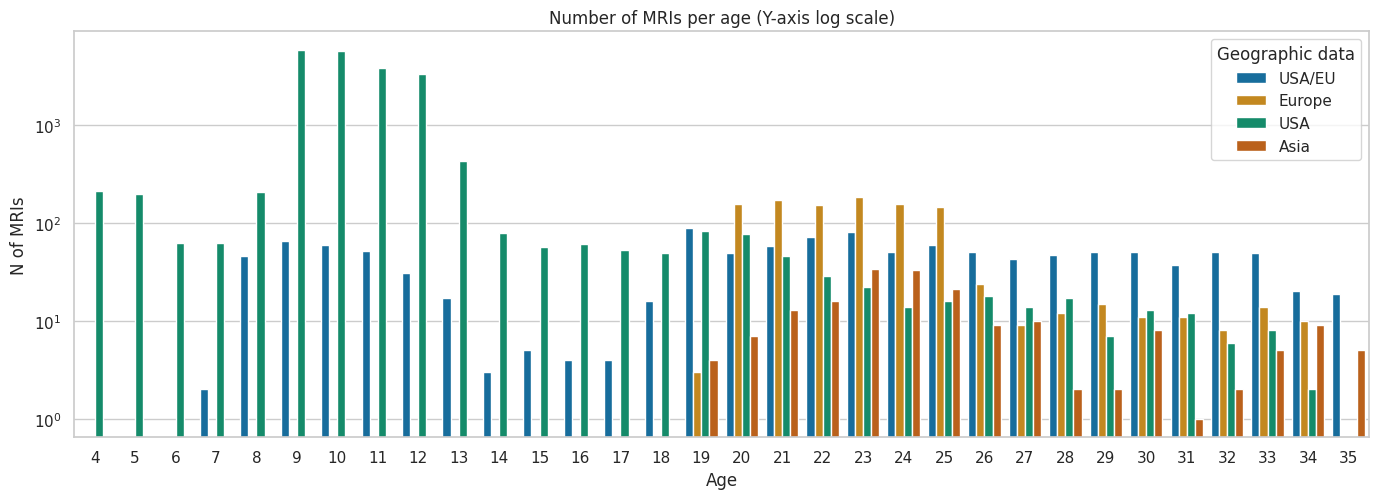

In [67]:
sns.set(rc={'figure.figsize':(16.7,5.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})

g = sns.countplot(data=df, x="Age", hue="Geographic data",palette="colorblind")
g.set_yscale("log")
g.set_title("Number of MRIs per age (Y-axis log scale)")
_ = g.set(xlabel="Age", ylabel="N of MRIs")
plt.savefig('data/abcd_plots/counts.png', dpi=300)

In [68]:
df['Geographic data'].value_counts(normalize=True)

USA       0.893565
USA/EU    0.051366
Europe    0.047183
Asia      0.007886
Name: Geographic data, dtype: float64

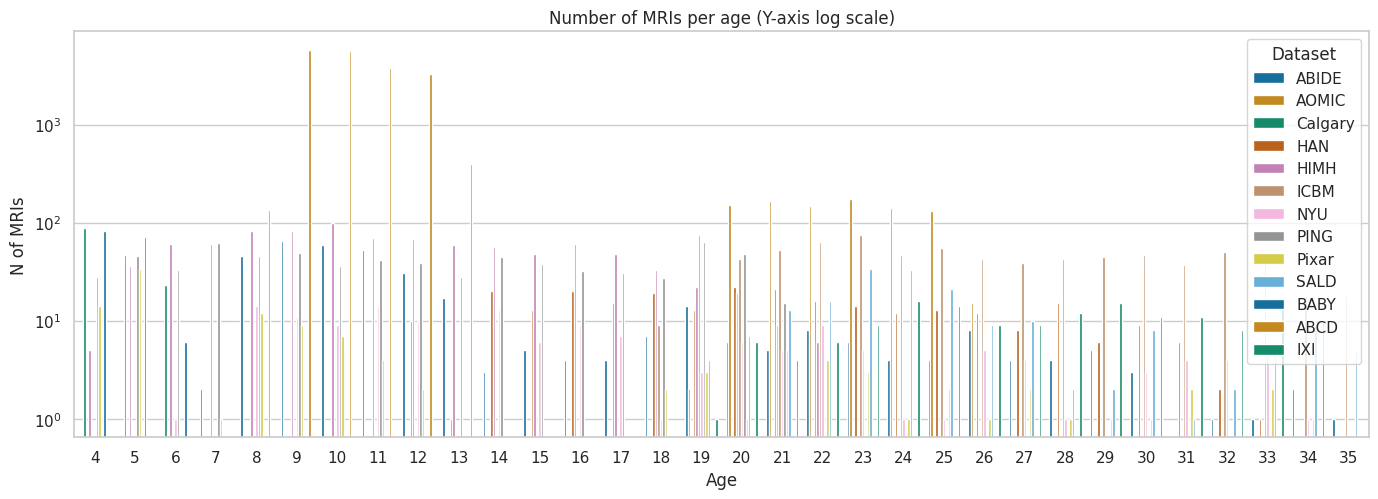

In [25]:
sns.set(rc={'figure.figsize':(16.7,5.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
df['Sex'] = df['Gender'].map({2:'Female',1:'Male'})
#df['Dataset'] = df['Dataset']'HIMN'='NIMH'
df.loc[df["Dataset"] == "HIMN", "Dataset"] = 'NIMH'

g = sns.countplot(data=df, x="Age", hue="Dataset",palette="colorblind")
g.set_yscale("log")
g.set_title("Number of MRIs per age (Y-axis log scale)")
_ = g.set(xlabel="Age", ylabel="N of MRIs")
plt.savefig('data/abcd_plots/counts.png', dpi=300)

In [36]:
dataset_lists = df["Dataset"].unique()

print('dataset','Q1','Q3','mean') 
for dataset in dataset_lists:
    r=df[df["Dataset"]==dataset]['Age']
    gender = df[df["Dataset"]==dataset]['Sex'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    Q3 = np.quantile(r, 0.75)
    Q1 = np.quantile(r, 0.25)
    mean = np.quantile(r, 0.5)
    print(dataset, Q1, Q3,mean)
    print(gender) 

dataset Q1 Q3 mean
ABIDE 9.0 15.0 11.0
Male      65.0%
Female    35.0%
Name: Sex, dtype: object
AOMIC 21.0 24.0 22.0
Female    52.0%
Male      48.0%
Name: Sex, dtype: object
Calgary 4.0 5.0 4.0
Male      59.7%
Female    40.3%
Name: Sex, dtype: object
HAN 17.0 25.0 21.0
Female    52.2%
Male      47.8%
Name: Sex, dtype: object
HIMH 8.0 15.0 11.0
Female    53.1%
Male      46.9%
Name: Sex, dtype: object
ICBM 22.0 30.0 25.0
Male      54.5%
Female    45.5%
Name: Sex, dtype: object
NYU 11.0 22.0 15.0
Female    62.5%
Male      37.5%
Name: Sex, dtype: object
PING 8.0 17.0 12.0
Male      51.3%
Female    48.7%
Name: Sex, dtype: object
Pixar 5.0 19.0 8.0
Female    55.7%
Male      44.3%
Name: Sex, dtype: object
SALD 23.0 26.0 24.0
Female    60.2%
Male      39.8%
Name: Sex, dtype: object
BABY 4.0 5.0 4.0
Male      50.9%
Female    49.1%
Name: Sex, dtype: object
ABCD 9.0 11.0 10.0
Male      52.7%
Female    47.3%
Name: Sex, dtype: object
IXI 24.0 31.0 28.0
Male      51.6%
Female    48.4%
Name: Sex, dty

## 2. Hormone Saliva Tests

In [605]:
df_hrm = pd.read_csv("data/ABCD-studies/abcd_hsss01.csv", header=0)

Normals for the children https://emedicine.medscape.com/article/2088870-overview?reg=1

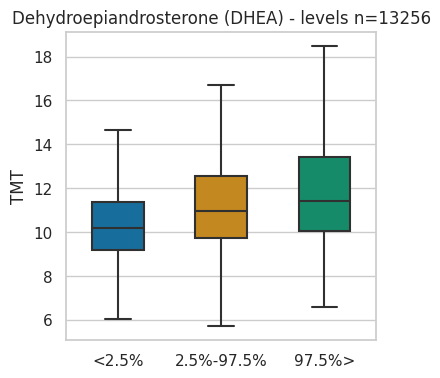

In [93]:
dict_dhea_norms = {
    1:
    {8:{'min':11,'max':120},
      9:{'min':11,'max':120},
      10:{'min':11,'max':120},
      11:{'min':14,'max':323},
      12:{'min':5.5,'max':(312+323)/2},
      13:{'min':5.5,'max':312}},
    
    2:
    {8:{'min':16,'max':96},
      9:{'min':16,'max':96},
      10:{'min':22,'max':184},
      11:{'min':11,'max':296},
      12:{'min':17,'max':343},
      13:{'min':(17+57)/2,'max':(343+395)/2}
      }
}

act_list2 = []
for idx in range(0, df_hrm.shape[0]):
    
    dhea = df_hrm.iloc[idx]['DHEA']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    first_q = dict_dhea_norms[gender][age]['min']
    third_q = dict_dhea_norms[gender][age]['max']
    
    if first_q > dhea:
        act_list2.append('<2.5%')
    elif first_q < dhea < third_q:
        act_list2.append('2.5%-97.5%')
    elif dhea > third_q:
        act_list2.append('97.5%>')
    else:
        act_list2.append("No data")
        
df_hrm['DHEA Reference Range'] = act_list2
df_hrm = df_hrm[df_hrm['DHEA Reference Range'] != "No data"]
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g = sns.boxplot(x="DHEA Reference Range", y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<2.5%','2.5%-97.5%','97.5%>'], 
            data=df_hrm,
            showfliers=False,
            palette="colorblind",
            width=0.5)
g.set_title("Dehydroepiandrosterone (DHEA) - levels n="+str(df_hrm.shape[0]))
#plt.xticks(rotation=20)
g.set(ylabel='TMT',xlabel="")
plt.savefig('data/abcd_plots/dhea_norms.png', dpi=300)

## Dehydroepiandrosterone (DHEA) - TMT quantiles

In [120]:
def find_centile(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    centile = 'out of range'
    if input_tmt<df.iloc[i]['X3']:
        centile ='< 3'
    if df.iloc[i]['X3']<=input_tmt<df.iloc[i]['X10']:
        centile ='3-10'
    if df.iloc[i]['X10']<=input_tmt<df.iloc[i]['X25']:
        centile ='10-25'
    if df.iloc[i]['X25']<=input_tmt<df.iloc[i]['X50']:
        centile ='25-50'
    if df.iloc[i]['X50']<=input_tmt<df.iloc[i]['X75']:
        centile ='50-75'
    if df.iloc[i]['X75']<=input_tmt<df.iloc[i]['X90']:
        centile ='75-90'
    if df.iloc[i]['X90']<=input_tmt<df.iloc[i]['X97']:
        centile ='90-97'
    if input_tmt>df.iloc[i]['X97']:
        centile ='97>'
    #print(val,i,centile)
    return centile

def find_centile_return_number(input_tmt, age, df):
    #print("TMT:",input_tmt,"Age:", age)
    val,i=closest_value(df['x'],age)
    
    centile = 'out of range'
    if input_tmt<df.iloc[i]['X3']:
        centile =3
    if df.iloc[i]['X3']<=input_tmt<df.iloc[i]['X10']:
        centile =10
    if df.iloc[i]['X10']<=input_tmt<df.iloc[i]['X25']:
        centile =25
    if df.iloc[i]['X25']<=input_tmt<df.iloc[i]['X50']:
        centile =50
    if df.iloc[i]['X50']<=input_tmt<df.iloc[i]['X75']:
        centile =75
    if df.iloc[i]['X75']<=input_tmt<df.iloc[i]['X90']:
        centile =90
    if df.iloc[i]['X90']<=input_tmt<df.iloc[i]['X97']:
        centile =97
    if input_tmt>df.iloc[i]['X97']:
        centile =105
    #print(val,i,centile)
    return centile

df_centile_boys = pd.read_csv('data/percentiles_chart_boys.csv',header=0)
df_centile_girls = pd.read_csv('data/percentiles_chart_girls.csv',header=0)

def closest_value(input_list, input_value):
    arr = np.asarray(input_list)
    i = (np.abs(arr - input_value)).argmin()
    return arr[i], i


https://pediatric.testcatalog.org/show/EEST 

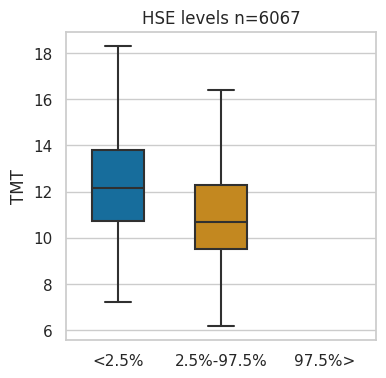

In [329]:
dict_hse_norms = {
    1:
    {8:{'min':0,'max':13},
      9:{'min':0,'max':13},
      10:{'min':0,'max':14},
      11:{'min':0,'max':15},
      12:{'min':0,'max':16},
      13:{'min':0,'max':26}},
    
    2:
    {8:{'min':0,'max':20},
      9:{'min':0,'max':22},
      10:{'min':0,'max':24},
      11:{'min':0,'max':60},
      12:{'min':15,'max':85},
      13:{'min':15,'max':85}
      }
}

act_list2 = []
for idx in range(0, df_hrm.shape[0]):
    
    hse = df_hrm.iloc[idx]['HSE']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    first_q = dict_hse_norms[gender][age]['min']
    third_q = dict_hse_norms[gender][age]['max']

    if first_q > hse:
        act_list2.append('<2.5%')
    elif first_q < hse < third_q:
        act_list2.append('2.5%-97.5%')
    elif hse > third_q:
        act_list2.append('97.5%>')
    else:
        act_list2.append("No data")
        
df_hrm['HSE levels'] = act_list2
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g=sns.boxplot(x="HSE levels", y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<2.5%','2.5%-97.5%','97.5%>'], 
            data=df_hrm,
            showfliers = False,
            palette="colorblind",
            width=0.5)
g.set_title("HSE levels n="+str(df_hrm.shape[0]))
g.set(ylabel='TMT',xlabel="")
plt.savefig('data/abcd_plots/hse_norms.png', dpi=300)

https://www.healthcare.uiowa.edu/path_handbook/handbook/test97.html

/tmp/ipykernel_3689773/4191921710.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  z = ((input_tmt/mu)**(nu)-1)/(nu*sigma)


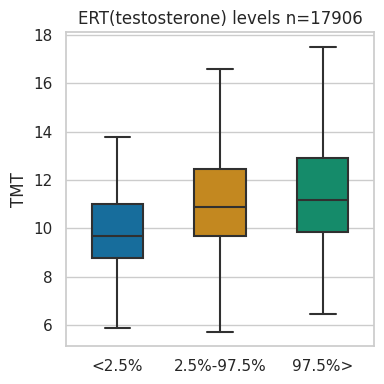

In [606]:
#https://livhealth.com/testosterone-in-women-and-men/#:~:text=6%2D9%20years%20old%3A%20below,below%207%2D75%20ng%2Fdl
dict_ert_norms = {
    1:
    {8:{'min':7,'max':20},
      9:{'min':7,'max':(20+130)/2},
      10:{'min':7,'max':130},
      11:{'min':7,'max':(130+800)/2},
      12:{'min':7,'max':800},
      13:{'min':7,'max':800}},

    
    2:
    {8:{'min':7,'max':20},
      9:{'min':7,'max':(20+44)/2},
      10:{'min':7,'max':44},
      11:{'min':7,'max':(44+75)/2},
      12:{'min':7,'max':75},
      13:{'min':7,'max':75}
      }
}

act_list2 = []
centile_dx_list=[]
for idx in range(0, df_hrm.shape[0]):
    
    ert = df_hrm.iloc[idx]['ERT']
    gender =  df_hrm.iloc[idx]['gender']
    age = df_hrm.iloc[idx]['Age']
    #print(hse)
    first_q = dict_ert_norms[gender][age]['min']
    third_q = dict_ert_norms[gender][age]['max']
    
    if df_hrm['gender'].iloc[idx]==2:
        sex=2
        centile_dx = find_exact_percentile_return_number(df_hrm['TMT PRED AVG filtered'].iloc[idx], age,df_centile_girls)
    else:
        sex=1
        centile_dx = find_exact_percentile_return_number(df_hrm['TMT PRED AVG filtered'].iloc[idx], age, df_centile_boys)
    centile_dx_list.append(centile_dx)
    
    
    if first_q > ert:
        act_list2.append('<2.5%')
    elif third_q > ert > first_q:
        act_list2.append('2.5%-97.5%')
    elif ert > third_q:
        act_list2.append('97.5%>')
    else:
        act_list2.append("No data")
        
df_hrm['ERT Levels'] = act_list2
df_hrm['Sex'] = df_hrm['gender'].map({2:'Female',1:'Male'})
df_hrm['Centiles'] = centile_dx_list
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g=sns.boxplot(x='ERT Levels', y="TMT PRED AVG filtered", #hue="HSE Quantiles",
            order=['<2.5%','2.5%-97.5%','97.5%>'], 
            data=df_hrm,
            showfliers = False,
            palette="colorblind",
            width=0.5)
g.set_title("ERT(testosterone) levels n="+str(df_hrm.shape[0]))
g.set(ylabel='TMT',xlabel="")
plt.savefig('data/abcd_plots/ert_norms.png', dpi=300)

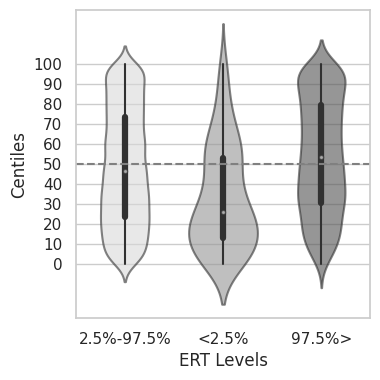

2.5%-97.5%    10911
No data        4494
97.5%>         2389
<2.5%           112
Name: ERT Levels, dtype: int64
2.5%-97.5% 2.5%-97.5% 59524960.5 1.0
2.5%-97.5% <2.5% 795213.5 3.8529059744316064e-08
2.5%-97.5% 97.5%> 11644259.5 3.052115860053033e-16
<2.5% 2.5%-97.5% 426818.5 3.8529059744316064e-08
<2.5% <2.5% 6272.0 1.0
<2.5% 97.5%> 79798.0 4.90800879068888e-13
97.5%> 2.5%-97.5% 14422119.5 3.052115860053033e-16
97.5%> <2.5% 187770.0 4.90800879068888e-13
97.5%> 97.5%> 2853660.5 1.0


In [607]:
from scipy import stats
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)     
ax=sns.violinplot( x="ERT Levels", y="Centiles",
            order=['2.5%-97.5%','<2.5%','97.5%>'], 
            data=df_hrm,
            dodge=False,
               #hue='Category',
                  width=0.7,
               palette = 'Greys',
                  alpha=0.3,
               #cut=0,
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()
print(df_hrm["ERT Levels"].value_counts())

unique_cols=['2.5%-97.5%','<2.5%','97.5%>']
for i in unique_cols:
    for j in unique_cols: 
        stat,p=stats.mannwhitneyu(df_hrm[df_hrm['ERT Levels']==i]['Centiles'], 
              df_hrm[df_hrm['ERT Levels']==j]['Centiles'])# ranksums
        print(i,j,stat,p)

## 3. Race

In [69]:
df_etnic = pd.read_csv("data/ABCD-studies/abcd_enticity.csv", header=0)

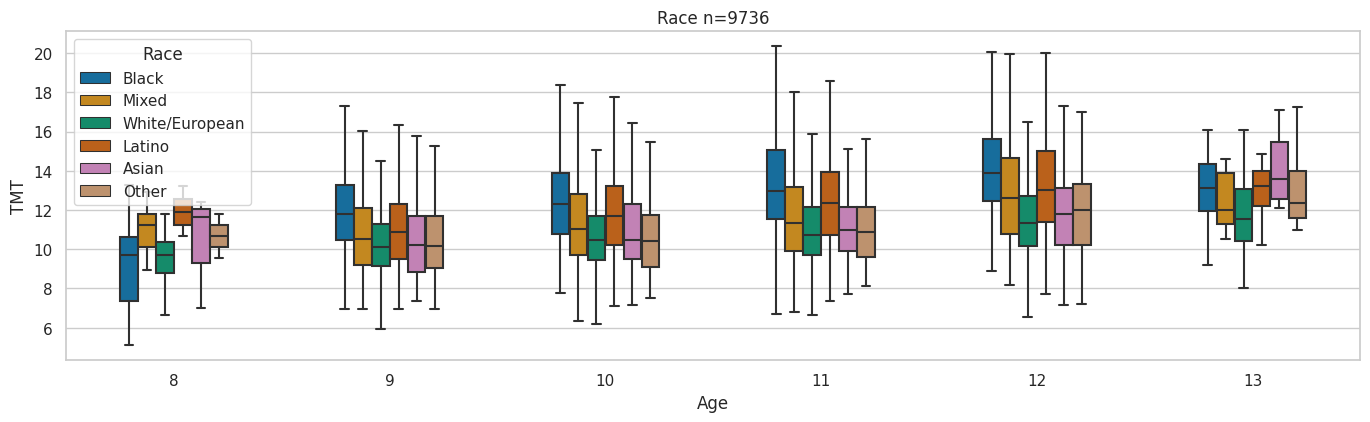

In [304]:
plt.clf()
sns.set(rc={'figure.figsize':(16.7,4.27),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
g=sns.boxplot(x="Age", y="TMT PRED AVG filtered", hue="Race", data=df_etnic, 
            showfliers = False,
            palette="colorblind", width=0.5)
g.set_title("Race n="+str(df_etnic.shape[0]))
g.set(ylabel='TMT')
plt.savefig('data/abcd_plots/race_mem.png', dpi=300)

In [70]:
df_etnic['Race'].value_counts(normalize=True)

White/European    0.590694
Latino            0.138969
Black             0.126335
Mixed             0.085148
Asian             0.029478
Other             0.029376
Name: Race, dtype: float64

In [79]:
lst_race =[]
for i in range(0,len(df)):
    if df['Dataset'].iloc[i] == 'ABCD':
        for j in range(0,len(df_etnic)):
            if df_etnic['id'].iloc[j].upper() in df['ID'].iloc[i].upper():
                lst_race.append([df['ID'].iloc[i],df_etnic['Race'].iloc[j]])
                break
            

In [80]:
pd.DataFrame(lst_race).to_csv("data/abcd_race_ids.csv")

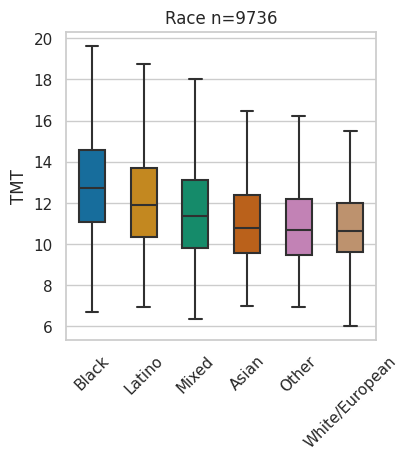

In [327]:
plt.clf()
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
g=sns.boxplot(x="Race", y="TMT PRED AVG filtered",  data=df_etnic, 
            order = ["Black","Latino","Mixed","Asian","Other","White/European"],
            showfliers = False,
            palette="colorblind", width=0.5)
g.set_title("Race n="+str(df_etnic.shape[0]))
g.set(ylabel='TMT',xlabel="")
plt.xticks(rotation=45)
plt.savefig('data/abcd_plots/race_mem_tiny.png', dpi=300)

In [171]:
res = permutation_test((list(df_etnic[df_etnic['Race']=='Other']['TMT PRED AVG filtered']),
                       list(df_etnic[df_etnic['Race']=='Black']['TMT PRED AVG filtered'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res.pvalue

9.999000099990002e-05

## 6. BMI vs TMT: abcd_ant01

In [228]:
df_ant = pd.read_csv("data/ABCD-studies/abcd_bmi.csv", header=0)
#df_ant_w_estimate.to_csv(path_or_buf= "data/ABCD-studies/abcd_bmi_w_estimate.csv")

BMI norms according to CDC charts https://www.cdc.gov/healthyweight/assessing/bmi/childrens_bmi/about_childrens_bmi.html / the bmigerev.xsl file

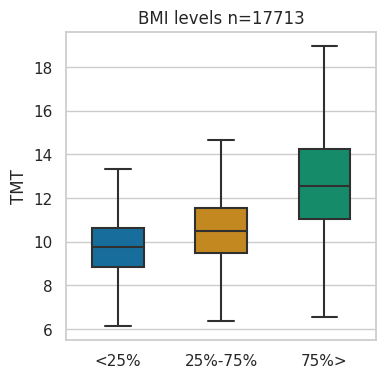

In [229]:
dict_bmi_norms = {
    1:
    {8:{'min':14.9,'max':17.3},
      9:{'min':15.3,'max':17.9},
      10:{'min':15.7,'max':18.6},
      11:{'min':16.2,'max':19.3},
      12:{'min':16.7,'max':20.0},
      13:{'min':17.3,'max':20.8}},
    
    2:
    {8:{'min':14.9,'max':17.6},
      9:{'min':15.3,'max':18.3},
      10:{'min':15.7,'max':19.0},
      11:{'min':16.2,'max':19.8},
      12:{'min':16.8,'max':20.6},
      13:{'min':17.3,'max':21.3}
      }
}

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    bmi = df_ant.iloc[idx]['BMI']
    gender =  df_ant.iloc[idx]['gender']
    age = df_ant.iloc[idx]['Age']
    
    first_q = dict_bmi_norms[gender][age]['min']
    third_q = dict_bmi_norms[gender][age]['max']

    if first_q > bmi:
        act_list2.append('<25%')
    elif third_q > bmi > first_q:
        act_list2.append('25%-75%')
    elif bmi > third_q:
        act_list2.append('75%>')
    else:
        act_list2.append("No data")
        
df_ant['BMI Quantiles'] = act_list2
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g=sns.boxplot(x="BMI Quantiles", y="TMT PRED AVG filtered", #hue="BMI Quantiles",
            order=['<25%','25%-75%','75%>'], 
            data=df_ant,
            palette="colorblind",
            showfliers = False,
            width=0.5)
g.set(ylabel='TMT',xlabel="")
g.set_title("BMI levels n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/bmi_quantiles.png', dpi=300)

In [169]:
res = permutation_test((list(df_ant[df_ant['BMI Quantiles']=='<25%']['TMT PRED AVG filtered']),
                       list(df_ant[df_ant['BMI Quantiles']=='25%-75%']['TMT PRED AVG filtered'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res.pvalue

9.999000099990002e-05

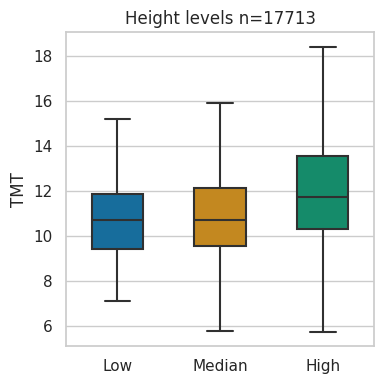

In [571]:
#https://childrenswi.org/medical-care/adolescent-health-and-medicine/issues-and-concerns/adolescent-growth-and-development/normal-growth
dict_height_norms = {
    1:
    {8:{'min':47,'max':54},
      9:{'min':47,'max':54},
      10:{'min':50,'max':59},
      11:{'min':50,'max':59},
      12:{'min':54,'max':64},
      13:{'min':54,'max':64}},
    
    2:
    {8:{'min':47,'max':54},
      9:{'min':47,'max':54},
      10:{'min':50,'max':59},
      11:{'min':50,'max':59},
      12:{'min':55,'max':64},
      13:{'min':55,'max':64}
      }
}

act_list2 = []
for idx in range(0, df_ant.shape[0]):
    height = df_ant.iloc[idx]['Height']
    gender =  df_ant.iloc[idx]['gender']
    age = df_ant.iloc[idx]['Age']
    
    first_q = dict_height_norms[gender][age]['min']
    third_q = dict_height_norms[gender][age]['max']

    if first_q > height:
        act_list2.append('Low')
    elif first_q < height < third_q:
        act_list2.append('Median')
    elif height > third_q:
        act_list2.append('High')
    else:
        act_list2.append("No data")
        
df_ant['Height Levels'] = act_list2
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g = sns.boxplot(x="Height Levels", y="TMT PRED AVG filtered",
            order=['Low','Median','High'], 
            data=df_ant,
            showfliers = False,
            palette="colorblind",
            width=0.5)
g.set_title("Height levels n="+str(df_ant.shape[0]))
g.set(ylabel='TMT',xlabel="")
plt.savefig('data/abcd_plots/height_levels.png', dpi=300)

In [213]:
res = permutation_test((list(df_ant[df_ant['Height Levels']=='Low']['TMT PRED AVG filtered']),
                       list(df_ant[df_ant['Height Levels']=='High']['TMT PRED AVG filtered'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res.pvalue

9.999000099990002e-05

In [590]:
#https://childrenswi.org/medical-care/adolescent-health-and-medicine/issues-and-concerns/adolescent-growth-and-development/normal-growth
dict_height_norms = {
    1:
    {8:{'min':46,'max':78},
      9:{'min':46,'max':78},
      10:{'min':54,'max':102},
      11:{'min':54,'max':102},
      12:{'min':66,'max':130},
      13:{'min':66,'max':130}},
    
    2:
    {8:{'min':44,'max':80},
      9:{'min':44,'max':80},
      10:{'min':54,'max':106},
      11:{'min':54,'max':106},
      12:{'min':68,'max':138},
      13:{'min':68,'max':138}
      }
}

act_list2 = []
centile_dx_list = []
for idx in range(0, df_ant.shape[0]):
    height = df_ant.iloc[idx]['Weight']
    gender =  df_ant.iloc[idx]['gender']
    age = df_ant.iloc[idx]['Age']
    
    first_q = dict_height_norms[gender][age]['min']
    third_q = dict_height_norms[gender][age]['max']
    
    if df_ant['gender'].iloc[idx]==2:
        sex=2
        centile_dx = find_exact_percentile_return_number(df_ant['TMT PRED AVG filtered'].iloc[idx], age,df_centile_girls)
    else:
        sex=1
        centile_dx = find_exact_percentile_return_number(df_ant['TMT PRED AVG filtered'].iloc[idx], age, df_centile_boys)
    centile_dx_list.append(centile_dx)
    if first_q > height:
        act_list2.append('Low')
    elif first_q < height < third_q:
        act_list2.append('Median')
    elif height > third_q:
        act_list2.append('High')
    else:
        act_list2.append("No data")
        
df_ant['Weight Levels'] = act_list2
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})
df_ant['Centiles']=centile_dx_list

/tmp/ipykernel_3689773/4191921710.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  z = ((input_tmt/mu)**(nu)-1)/(nu*sigma)


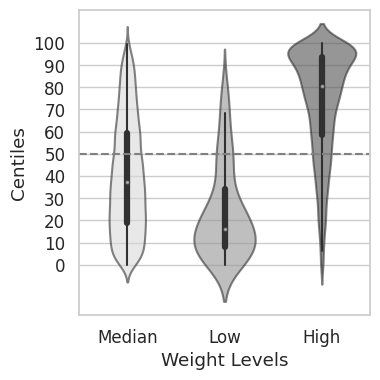

Median Median 77190312.5 1.0
Median Low 890732.0 6.7762423831153975e-12
Median High 11040911.5 0.0
Low Median 389043.0 6.7762423831153975e-12
Low Low 5304.5 1.0
Low High 40788.0 1.0278972630300848e-48
High Median 51643213.5 0.0
High Low 478847.0 1.0278972630300848e-48
High High 12726012.5 1.0


In [591]:
from scipy import stats
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)     
df_ant['Gender'] = df_ant['Sex'].map({2:'Female',1:'Male'})
ax=sns.violinplot( x="Weight Levels", y="Centiles",
            order=['Median','Low','High'], 
            data=df_ant,
            dodge=False,
               #hue='Category',
                  width=0.7,
               palette = 'Greys',
                  alpha=0.3,
               #cut=0,
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()
df_ant["Weight Levels"].value_counts()

unique_cols=['Median','Low','High']
for i in unique_cols:
    for j in unique_cols: 
        stat,p=stats.mannwhitneyu(df_ant[df_ant['Weight Levels']==i]['Centiles'], 
              df_ant[df_ant['Weight Levels']==j]['Centiles'])# ranksums
        print(i,j,stat,p)

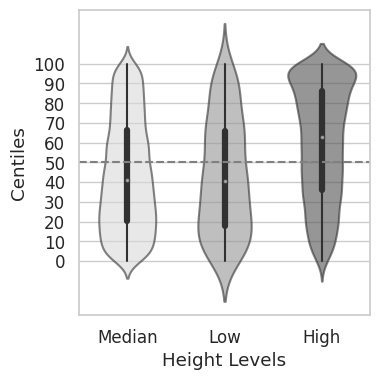

Median     10790
High        5871
No data      878
Low          174
Name: Height Levels, dtype: int64
Median Median 58212050.0 1.0
Median Low 954130.5 0.7100338410267752
Median High 22009259.0 6.142574043470628e-233
Low Median 923329.5 0.7100338410267752
Low Low 15138.0 1.0
Low High 350271.5 1.4965745543512236e-12
High Median 41338831.0 6.142574043470628e-233
High Low 671282.5 1.4965745543512236e-12
High High 17234320.5 1.0


In [592]:
from scipy import stats
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)     
df_ant['Gender'] = df_ant['Sex'].map({2:'Female',1:'Male'})
ax=sns.violinplot( x="Height Levels", y="Centiles",
            order=['Median','Low','High'], 
            data=df_ant,
            dodge=False,
               #hue='Category',
                  width=0.7,
               palette = 'Greys',
                  alpha=0.3,
               #cut=0,
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()
print(df_ant["Height Levels"].value_counts())

unique_cols=['Median','Low','High']
for i in unique_cols:
    for j in unique_cols: 
        stat,p=stats.mannwhitneyu(df_ant[df_ant['Height Levels']==i]['Centiles'], 
              df_ant[df_ant['Height Levels']==j]['Centiles'])# ranksums
        print(i,j,stat,p)

In [338]:
res = permutation_test((list(df_ant[df_ant['Weight Levels']=='Low']['TMT PRED AVG filtered']),
                       list(df_ant[df_ant['Weight Levels']=='High']['TMT PRED AVG filtered'])), 
                       statistic, n_resamples=10000,
                       vectorized=True, alternative='less',
                       random_state=42)
res.pvalue

9.999000099990002e-05

### Height-adjusted TMT and bmi-adjusted TMT 

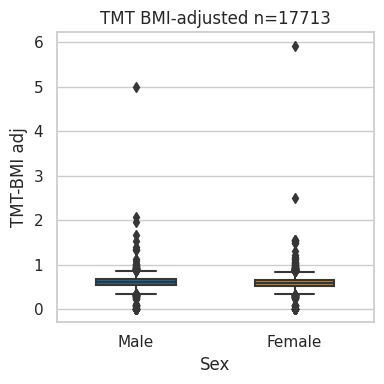

In [574]:
df_ant['TMT-BMI adj'] = df_ant["TMT PRED AVG filtered"]/df_ant['BMI']
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

#df_ant = df_ant[df_ant['TMT-BMI adj']<2.5]
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Sex", y="TMT-BMI adj",
            #showfliers=False,
            data=df_ant, palette="colorblind", width=0.5,).set_title("TMT BMI-adjusted n="+str(df_ant.shape[0]))
plt.savefig('data/abcd_plots/tmt-bmi-adj.png', dpi=300)

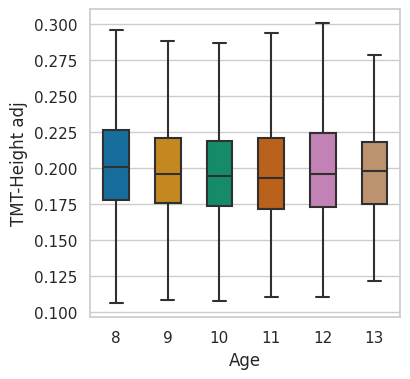

In [324]:
df_ant['TMT-Height adj'] = df_ant["TMT PRED AVG filtered"]/df_ant['Height']
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")


#df_ant = df_ant[df_ant['TMT-BMI adj']<2.5]
df_ant['Sex'] = df_ant['gender'].map({2:'Female',1:'Male'})
sns.boxplot(x="Age", y="TMT-Height adj",#,hue='Sex', 
            showfliers=False,
            data=df_ant, palette="colorblind", width=0.5)
g.set_title("TMT Height-adjusted n="+str(df_ant.shape[0]))
g.set(xlabel="")
plt.savefig('data/abcd_plots/tmt-height-adj.png', dpi=300)

In [ ]:
df_ant[df_ant['TMT-BMI adj']>1.]

## 7. Steps activity levels abcd_fbwpas01

Boys to average 12,000 to 16,000 steps/day and girls to average 10,000 to 13,000 steps/day;  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3166269/
acc to
https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79 norm is between 7100-11000 steps/day


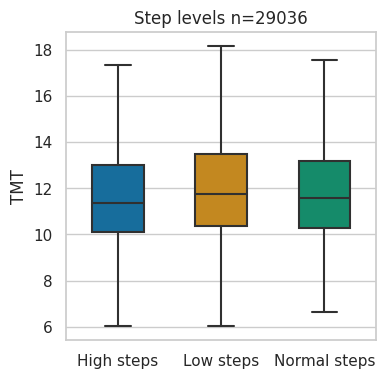

In [323]:
df_step = pd.read_csv("data/ABCD-studies/abcd_steps.csv", header=0)

df_step['Sex'] = df_step['Gender'].map({2:'Female',1:'Male'})

healthy_male_lower =  12000#7100#12000
healthy_male_higher = 16000#11000#16000

healthy_female_lower = 10000#7100#10000
healthy_female_higher = 13000#11000#13000

steps_list =[]
for idx in range(0, df_step.shape[0]):
    row = df_step.iloc[idx]['Total steps']
    gender = df_step.iloc[idx]['Gender']
    
    if healthy_male_lower > row and gender==1:
        steps_list.append('Low steps')
    elif healthy_male_lower < row < healthy_male_higher and gender==1: 
        steps_list.append('Normal steps')
    elif row > healthy_male_higher and gender==1:
        steps_list.append('High steps')
        
    elif healthy_female_lower > row and gender==2:
        steps_list.append('Low steps')
    elif healthy_female_lower < row < healthy_female_higher and gender==2: 
        steps_list.append('Normal steps')
    elif row > healthy_female_higher and gender==2:
        steps_list.append('High steps')
        
    else:
        steps_list.append("No data")
        
df_step['Step levels'] = steps_list
df_step=df_step[df_step['Step levels']!="No data"]

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
g=sns.boxplot(#x="Sex",
            y="TMT PRED AVG filtered",
            x='Step levels',
            showfliers = False,
            hue_order=['Low','Normal','High'], 
            data=df_step, palette="colorblind", width=0.5)
g.set_title("Step levels n="+str(df_step.shape[0]))
g.set(ylabel='TMT',xlabel="")
#plt.xticks(rotation=45)
plt.savefig('data/abcd_plots/dt_steps_levels.png', dpi=300)

## 8. Calorical Intake (abcd_bkfs01)

According to dietary reccomendations, healthy child kcal/d intake for range 9-13 years Female 1600 kcal/d, Male 1800 kcal/d https://www.heart.org/en/healthy-living/healthy-eating/eat-smart/nutrition-basics/dietary-recommendations-for-healthy-children
https://www.healthychildren.org/English/healthy-living/nutrition/Pages/Energy-In-Recommended-Food-Drink-Amounts-for-Children.aspx

But it also depends on the activity levels

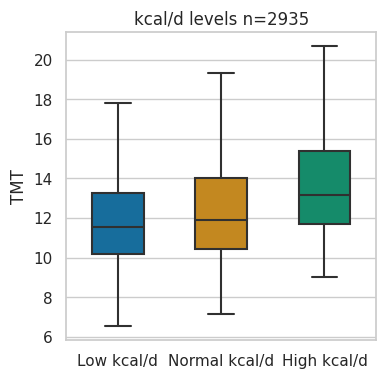

In [331]:
df_cals = pd.read_csv("data/ABCD-studies/abcd_cals.csv", header=0)
df_cals['Sex'] = df_cals['Gender'].map({2:'Female',1:'Male'})


healthy_male_lower = 1600
healthy_male_higher = 2600

healthy_female_lower = 1400
healthy_female_higher = 2200

cals_list =[]
for idx in range(0, df_cals.shape[0]):
    row = df_cals.iloc[idx]['Dt_kcal']
    gender = df_cals.iloc[idx]['Gender']
    
    if healthy_male_lower > row and gender==1:
        cals_list.append('Low kcal/d')
    elif healthy_male_lower < row < healthy_male_higher and gender==1: 
        cals_list.append('Normal kcal/d')
    elif row > healthy_male_higher and gender==1:
        cals_list.append('High kcal/d')
        
    elif healthy_female_lower > row and gender==2:
        cals_list.append('Low kcal/d')
    elif healthy_female_lower < row < healthy_female_higher and gender==2: 
        cals_list.append('Normal kcal/d')
    elif row > healthy_female_higher and gender==2:
        cals_list.append('High kcal/d')
        
    else:
        cals_list.append("No data")
        
df_cals['kcal/d levels'] = cals_list

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g=sns.boxplot(x='kcal/d levels',
            y="TMT PRED AVG filtered",
            #hue='kcal/d levels',
            showfliers=False,
            order=['Low kcal/d','Normal kcal/d','High kcal/d'], 
            data=df_cals, palette="colorblind", width=0.5)
g.set(ylabel='TMT',xlabel="")
g.set_title("kcal/d levels n="+str(df_cals.shape[0]))
plt.savefig('data/abcd_plots/dt_cals_levels.png', dpi=300)

## 9. Blood Hemoglobin and Cholesterol abcd_ybd01

HDL Cholesterol in healthy kids younger <18 should be more than 45 mg/dl; non-HDL <120mg/dL https://medlineplus.gov/highcholesterolinchildrenandteens.html

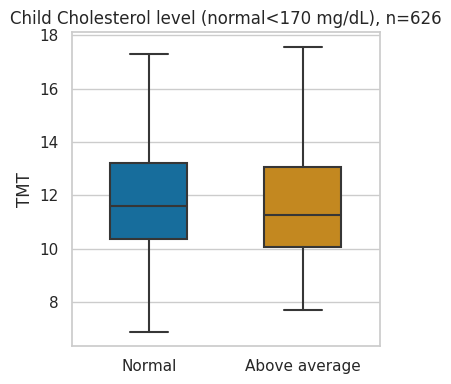

In [593]:
df_blood = pd.read_csv("data/ABCD-studies/abcd_blood.csv", header=0)

df_blood["Cholesterol level"] = np.where(df_blood['Cholesterol']>=170, "Above average", "Normal") 

centile_dx_list=[]
for idx in range(0, df_blood.shape[0]):
    gender =  df_blood.iloc[idx]['Gender']
    age = df_blood.iloc[idx]['Age']
    
    if df_blood['Gender'].iloc[idx]==2:
        sex=2
        centile_dx = find_exact_percentile_return_number(df_blood['TMT PRED AVG filtered'].iloc[idx], age,df_centile_girls)
    else:
        sex=1
        centile_dx = find_exact_percentile_return_number(df_blood['TMT PRED AVG filtered'].iloc[idx], age, df_centile_boys)
    centile_dx_list.append(centile_dx)

df_blood['Centiles']=centile_dx_list   
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
g=sns.boxplot(x="Cholesterol level",
            y="TMT PRED AVG filtered",# hue="Above normal non-HDL Cholesterol level, 120mg/dL>",
            data=df_blood, 
            showfliers = False,
            palette="colorblind", width=0.5)
g.set_title("Child Cholesterol level (normal<170 mg/dL), n="+str(df_blood.shape[0]))
g.set(ylabel='TMT',xlabel="")

plt.savefig('data/abcd_plots/dt_cholester_dm.png', dpi=300)

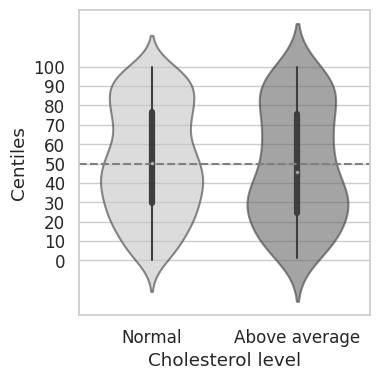

Normal           496
Above average    130
Name: Cholesterol level, dtype: int64
Normal Normal 123008.0 1.0
Normal Above average 33963.0 0.3480210729001715
Above average Normal 30517.0 0.3480210729001715
Above average Above average 8450.0 1.0


In [598]:
from scipy import stats
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)     
#df_blood['Gender'] = df_blood['Sex'].map({2:'Female',1:'Male'})
ax=sns.violinplot( x="Cholesterol level", y="Centiles",
            order=['Normal','Above average'], 
            data=df_blood,
            dodge=False,
               #hue='Category',
                  width=0.7,
               palette = 'Greys',
                  alpha=0.3,
               #cut=0,
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()
print(df_blood["Cholesterol level"].value_counts())

unique_cols=['Normal','Above average']
for i in unique_cols:
    for j in unique_cols: 
        stat,p=stats.mannwhitneyu(df_blood[df_blood['Cholesterol level']==i]['Centiles'], 
              df_blood[df_blood['Cholesterol level']==j]['Centiles'])# ranksums
        print(i,j,stat,p)

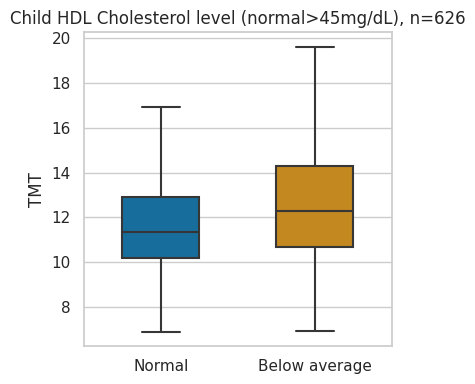

In [600]:
df_blood["HDL"] = np.where(df_blood['HDL Cholesterol']>=45, "Normal", "Below average") 

sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")
g=sns.boxplot( y="TMT PRED AVG filtered", 
            x="HDL", 
            showfliers = False,
            data=df_blood, 
            palette="colorblind", width=0.5)
g.set_title("Child HDL Cholesterol level (normal>45mg/dL), n="+str(df_blood.shape[0]))
g.set(ylabel='TMT',xlabel="")

plt.savefig('data/abcd_plots/dt_cholester_dm_hdl.png', dpi=300)

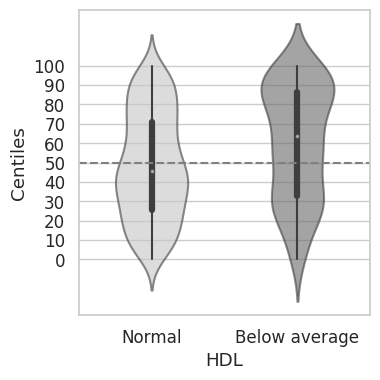

Normal           481
Below average    145
Name: HDL, dtype: int64
Normal Normal 115680.5 1.0
Normal Below average 26703.5 1.877280643486234e-05
Below average Normal 43041.5 1.877280643486234e-05
Below average Below average 10512.5 1.0


In [603]:
from scipy import stats
f, ax = plt.subplots(figsize=(4, 4))

sns.set(style="whitegrid",font_scale= 1.1)     
#df_blood['Gender'] = df_blood['Sex'].map({2:'Female',1:'Male'})
ax=sns.violinplot( x="HDL", y="Centiles",
            order=['Normal','Below average'], 
            data=df_blood,
            dodge=False,
               #hue='Category',
                  width=0.5,
               palette = 'Greys',
                  alpha=0.3,
               #cut=0,
                saturation = 4)
plt.setp(ax.collections, alpha=.6)
ax.set_yticks(range(0,101,10))
ax.axhline(y = 50, color = 'gray',linestyle="--")
plt.show()
print(df_blood["HDL"].value_counts())

unique_cols=['Normal','Below average']
for i in unique_cols:
    for j in unique_cols: 
        stat,p=stats.mannwhitneyu(df_blood[df_blood['HDL']==i]['Centiles'], 
              df_blood[df_blood['HDL']==j]['Centiles'])# ranksums
        print(i,j,stat,p)

According to medscape, avg hemoglobin levels in kids 6-18 years: 10-15.5 g/dL
https://emedicine.medscape.com/article/2085614-overview#:~:text=6%20months%2D1%20year%3A%209.5,%3A%2010%2D15.5%20g%2FdL

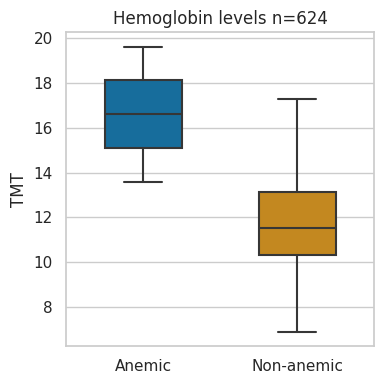

In [437]:
first_q = 10.0
third_q = 15.5

hb_list =[]
for idx in range(0, df_blood.shape[0]):
    row = df_blood.iloc[idx]['Hemoglobin']
    #print(row)
    if first_q > row:
        hb_list.append('Anemic')
    elif first_q < row<  third_q: 
        hb_list.append('Non-anemic')
    elif row > third_q:
        hb_list.append('Non-anemic')
    else:
        hb_list.append("No data")
        
df_blood['Hb'] = hb_list
df_blood = df_blood[df_blood['Hb']!='No data']
sns.set(rc={'figure.figsize':(4,4),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid")

g=sns.boxplot(x="Hb",
            y="TMT PRED AVG filtered",
            showfliers = False,
            order=['Anemic',
                       'Non-anemic'], 
            data=df_blood, palette="colorblind", width=0.5)
g.set_title("Hemoglobin levels n="+str(df_blood.shape[0]))
g.set(ylabel='TMT',xlabel="")
plt.savefig('data/abcd_plots/dt_hemoglobin_levels.png', dpi=300)


In [439]:
df_blood[df_blood['Hb']=='Anemic']

,Unnamed: 0,id,Age,Gender,Hemoglobin,Cholesterol,HDL Cholesterol,TMT PRED AVG filtered,Cholesterol level,Hb
386,386,NDARINV3DVAWVGU,11,2,9.9,156.0,59.0,13.58,Normal,Anemic
596,596,NDARINVN542D50W,12,2,9.5,70.0,32.0,19.63,Normal,Anemic


## Head CRM

In [576]:
input_annotation_file = 'data/dataset_measured_heads_filtered.csv'
df_crm = pd.read_csv(input_annotation_file, header=0,)
df_crm['Adjusted TMT by head crm'] = df_crm['TMT PRED AVG filtered']/df_crm['perimeter_opencv']
df_crm.loc[df_crm.Age > 30, 'Age'] = 30

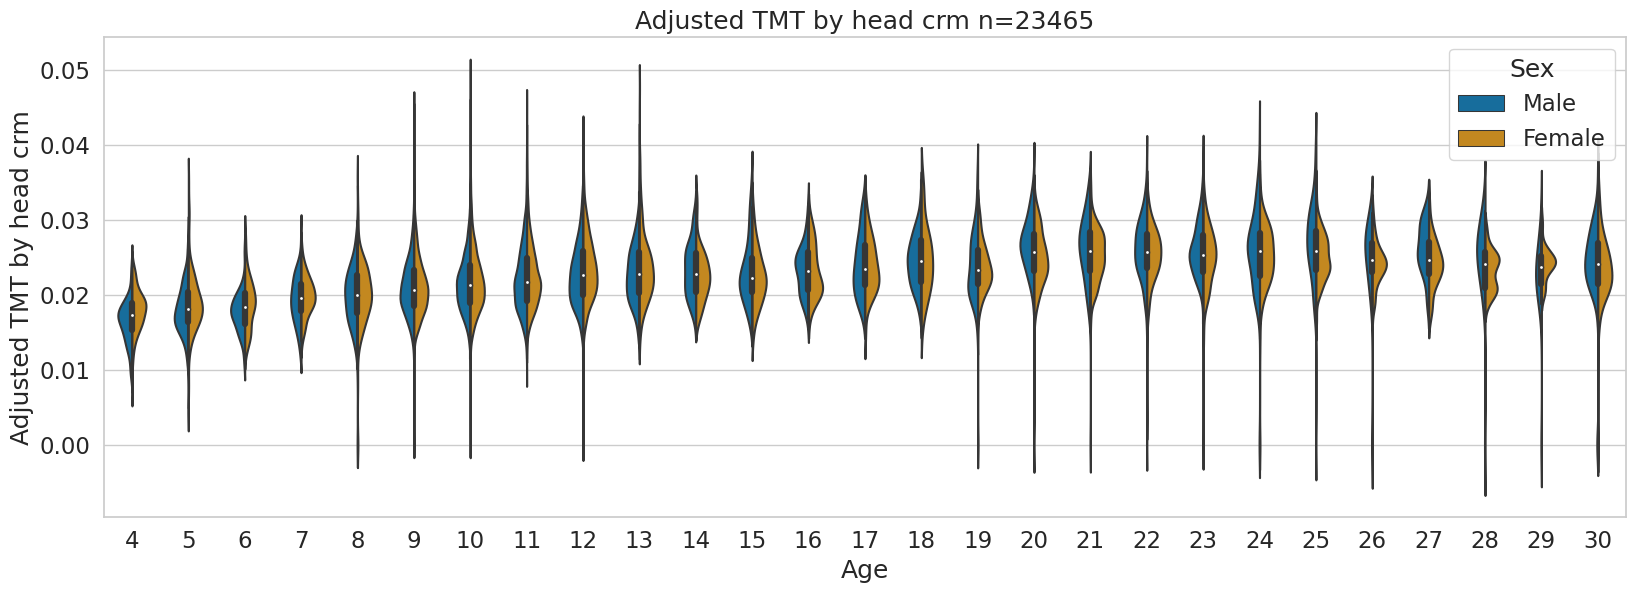

In [580]:
#plot general
#sns.set(style="whitegrid", font_scale=1.5)
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
sns.set_style("whitegrid")
df_crm['Sex'] =df_crm['Gender'].map({2:'Female',1:'Male'})
sns.violinplot(x="Age", y="Adjusted TMT by head crm", hue="Sex", data=df_crm, split=True,
            palette="colorblind", width=0.5).set_title("Adjusted TMT by head crm n="+str(df_crm.shape[0]))
plt.savefig('data/abcd_plots/crm.png', dpi=300)

In [582]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_crm['TMT PRED AVG filtered'], df_crm['perimeter_opencv'])
print('Pearsons correlation: %.3f' % corr)

from scipy.stats import spearmanr
corr, _ = spearmanr(df_crm['TMT PRED AVG filtered'], df_crm['perimeter_opencv'])
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.420
Spearmans correlation: 0.343


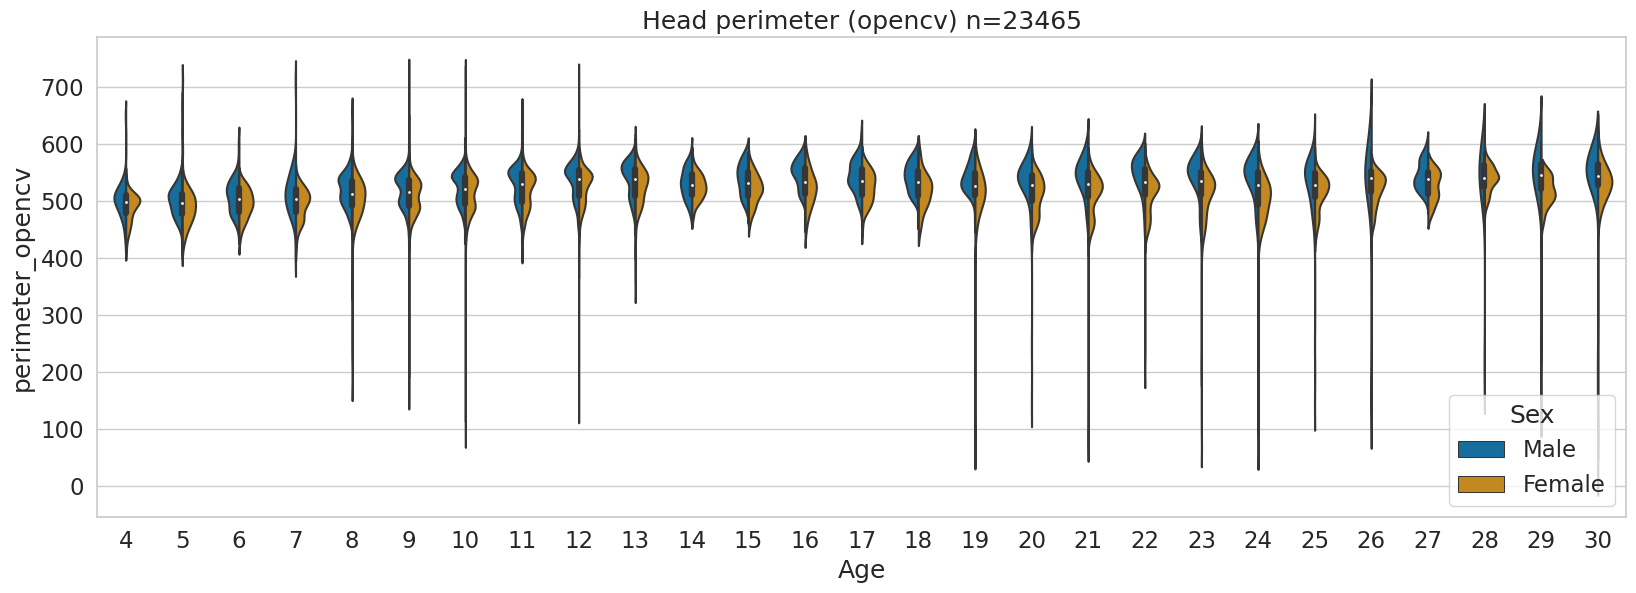

In [581]:
#plot general
sns.set(rc={'figure.figsize':(16.7,6.27),'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=1.5)
sns.set_style("whitegrid")
df_crm['Sex'] = df_crm['Gender'].map({2:'Female',1:'Male'})
sns.violinplot(x="Age", y="perimeter_opencv", hue="Sex", data=df_crm, showfliers=False,split=True,
            palette="colorblind", width=0.5).set_title("Head perimeter (opencv) n="+str(df_crm.shape[0]))
plt.savefig('data/abcd_plots/perimeter_opencv.png', dpi=300)